Linear Regression:
  - MSE: 3179874.66
  - R²: 0.1957
Ridge:
  - MSE: 3179900.57
  - R²: 0.1957
Lasso:
  - MSE: 3180143.10
  - R²: 0.1956
Random Forest:
  - MSE: 184902.92
  - R²: 0.9532


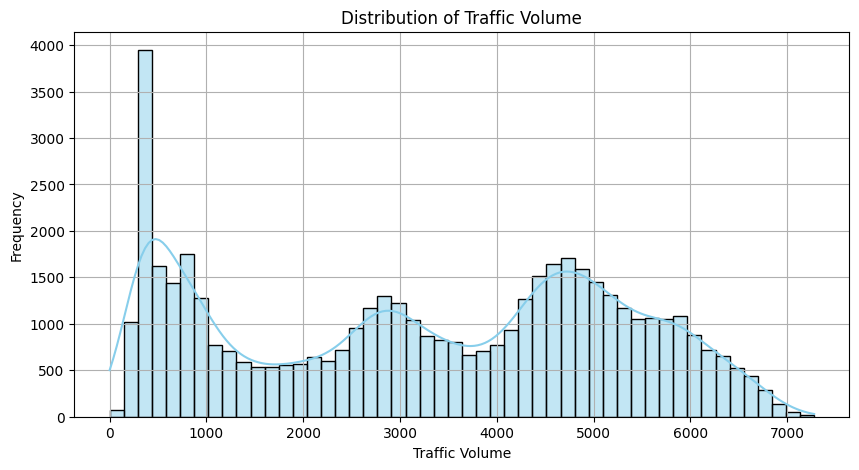

<ipython-input-3-e0fa95e66e51>:105: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='hour', y='traffic_volume', data=df, palette='coolwarm')


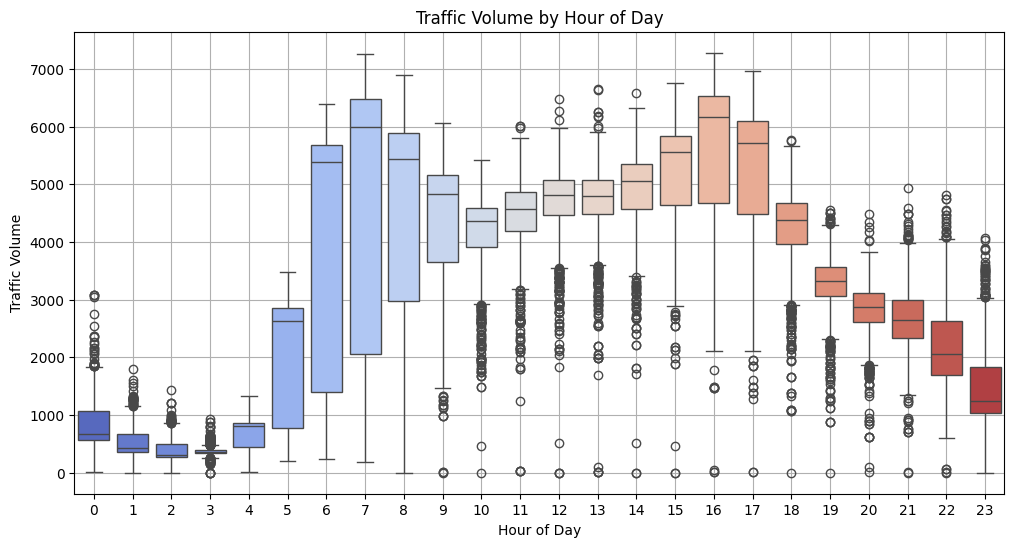

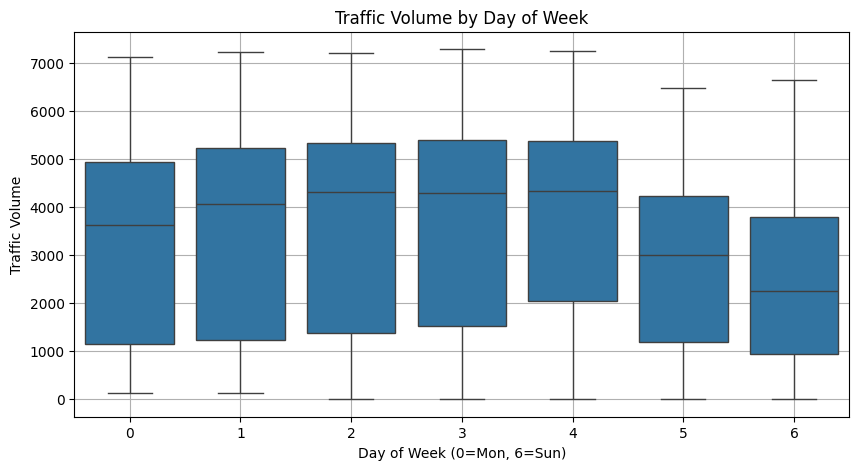

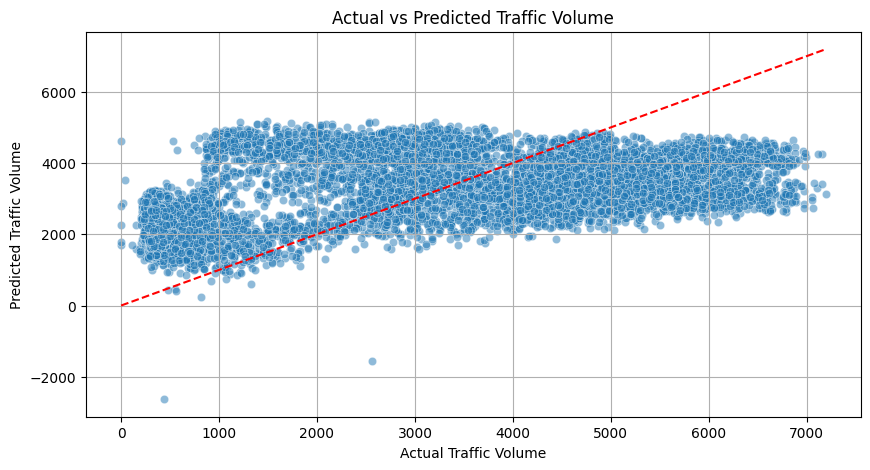

In [3]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
df = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

# --- Feature Engineering ---

# Convert 'date_time' to datetime format
df['date_time'] = pd.to_datetime(df['date_time'])

# Extract time-based features
df['hour'] = df['date_time'].dt.hour
df['dayofweek'] = df['date_time'].dt.dayofweek
df['month'] = df['date_time'].dt.month
df['year'] = df['date_time'].dt.year
df['is_weekend'] = (df['dayofweek'] >= 5).astype(int)

# Drop original datetime column
df = df.drop(columns=['date_time'])

# Separate features and target
X = df.drop(columns=['traffic_volume'])
y = df['traffic_volume']

# --- Preprocessing ---

categorical_features = ['holiday', 'weather_main', 'weather_description']
numerical_features = [col for col in X.columns if col not in categorical_features]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numerical_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ]
)

# Pipeline with Linear Regression
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# --- Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# --- Evaluation ---
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# --- Visualizations with labels and textual summaries ---

# 1. Distribution of traffic volume
plt.figure(figsize=(12, 6))
sns.histplot(y, bins=50, kde=True, color='skyblue')
plt.title('Distribution of Traffic Volume', fontsize=16)
plt.xlabel('Traffic Volume', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print(f"Traffic Volume statistics:\n"
      f" - Minimum: {y.min()}\n"
      f" - Maximum: {y.max()}\n"
      f" - Mean: {y.mean():.2f}\n"
      f" - Median: {y.median()}\n"
      f" - Std Deviation: {y.std():.2f}\n")

# 2. Traffic volume by hour of the day
plt.figure(figsize=(14, 6))
sns.boxplot(x='hour', y='traffic_volume', data=df, palette='coolwarm')
plt.title('Traffic Volume by Hour of Day', fontsize=16)
plt.xlabel('Hour of Day (0-23)', fontsize=14)
plt.ylabel('Traffic Volume', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print("Observation: Traffic volume tends to peak during typical rush hours (early morning and late afternoon).")

# 3. Traffic volume by day of the week
plt.figure(figsize=(12, 6))
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sns.boxplot(x='dayofweek', y='traffic_volume', data=df, palette='viridis')
plt.title('Traffic Volume by Day of Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=14)
plt.xticks(ticks=np.arange(7), labels=days)
plt.ylabel('Traffic Volume', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print("Observation: Weekdays have generally higher traffic volumes compared to weekends.")

# 4. Traffic volume by weather main categories
plt.figure(figsize=(12, 6))
sns.boxplot(x='weather_main', y='traffic_volume', data=df, palette='Set3')
plt.title('Traffic Volume by Weather Condition', fontsize=16)
plt.xlabel('Weather Main Category', fontsize=14)
plt.ylabel('Traffic Volume', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.show()

print("Observation: Weather conditions like Clear tend to have higher traffic volumes, while adverse weather lowers traffic.")

# 5. Actual vs Predicted traffic volume scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Traffic Volume', fontsize=16)
plt.xlabel('Actual Traffic Volume', fontsize=14)
plt.ylabel('Predicted Traffic Volume', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print(f"Model performance:\n"
      f" - Mean Squared Error (MSE): {mse:.2f}\n"
      f" - R² Score: {r2:.2f}\n"
      f"The scatter plot shows that predictions mostly align well with actual traffic volumes, clustering near the ideal prediction line.")